# Множественная линейная регрессия
- Это статистический метод, используемый для изучения линейной зависимости между зависимой переменной и несколькими независимыми переменными.
- Включает более одной независимой переменной.
- Множественная линейная регрессия является расширением простой линейной регрессии, где несколько независимых переменных используются для прогнозирования зависимой переменной.
- Категориальные переменные могут обрабатываться в множественной линейной регрессии с использованием one-hot кодирования или кодирования меток.

Множественная линейная регрессия является расширением простой линейной регрессии, поскольку для прогнозирования переменной ответа требуется более одной предикторной переменной. Это важный алгоритм регрессии, который моделирует линейную зависимость между одной зависимой непрерывной переменной и более чем одной независимой переменной. Он использует две или более независимых переменных для прогнозирования зависимой переменной путем подбора наилучшей линейной зависимости.
Он имеет две или более независимых переменных (X) и одну зависимую переменную (Y), где Y - прогнозируемое значение. Таким образом, это подход для прогнозирования количественного ответа с использованием нескольких признаков.

Уравнение: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e

1. Y = Зависимая переменная / целевая переменная
2. β0 = Пересечение линии регрессии
3. β1, β2, β3, …. βn = Наклон линии регрессии, который указывает, увеличивается или уменьшается линия
4. X1, X2, X3, ….Xn = Независимая переменная / предикторная переменная
5. e = ошибка

Пример: Прогнозирование продаж на основе денег, потраченных на маркетинг на телевидении, радио и в газетах. В этом случае существуют три независимые переменные, т.е. деньги, потраченные на телевидение, радио и газеты в маркетинговых целях, и одна зависимая переменная, т. е. продажи, которые являются прогнозируемым значением.

Обучение модели множественной линейной регрессии:
- Шаг 1: Чтение набора данных
- Шаг 2: Обработка категориальных переменных
- Шаг 3: Разделение данных
- Шаг 4: Применение модели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("Datasets/cars.csv")

In [3]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.shape

(36, 5)

In [5]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [6]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


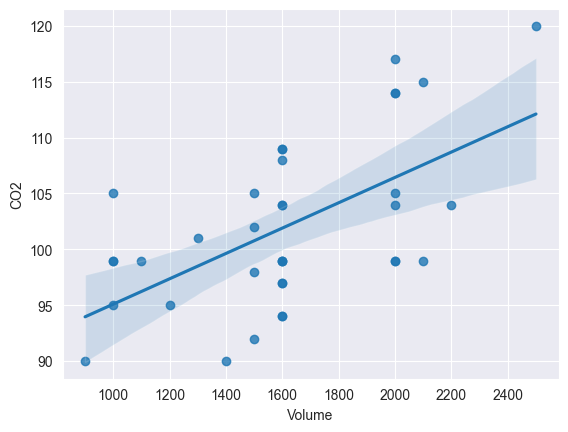

In [9]:
vreg = sns.regplot(x='Volume', y='CO2', data=df)

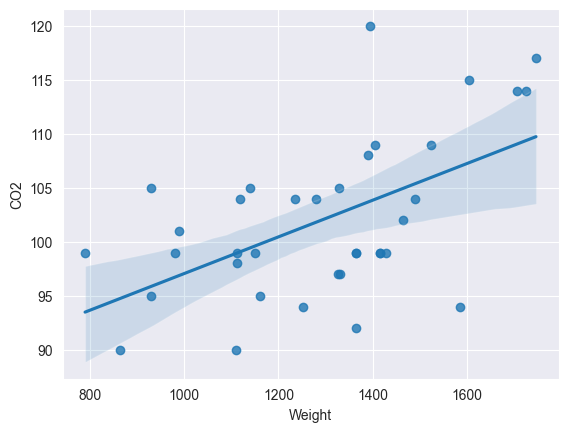

In [10]:
wreg = sns.regplot(x='Weight', y='CO2', data=df)

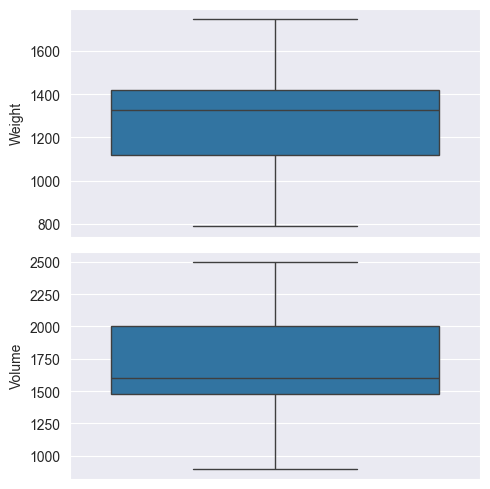

In [11]:
fig, axs = plt.subplots(2, figsize=(5, 5))
plt1 = sns.boxplot(df['Weight'], ax=axs[0])
plt2 = sns.boxplot(df['Volume'], ax=axs[1])
plt.tight_layout()

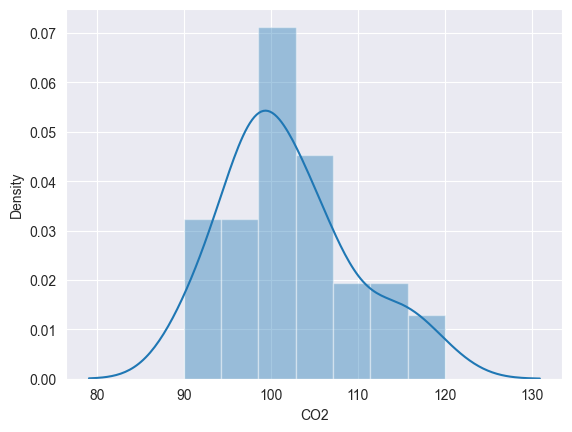

In [12]:
sns.distplot(df['CO2']);

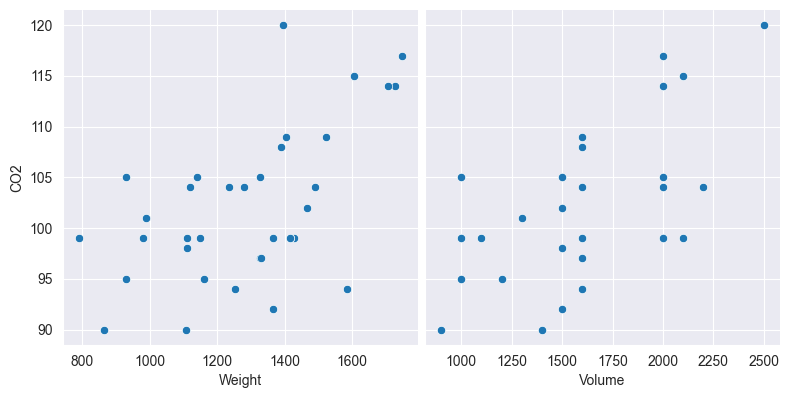

In [13]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
y_train.shape

(25,)

In [15]:
y_test.shape

(11,)

In [16]:
reg_model = LinearRegression().fit(X_train, y_train)
print('Intercept: ', reg_model.intercept_)
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [19]:
y_pred = reg_model.predict(X_test)
x_pred = reg_model.predict(X_train)
print("Прогноз на тесте: {}".format(y_pred))

Прогноз на тесте: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [20]:
# Сравним реальные данные и прогноз
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [21]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018


# Проведем линейную регрессию и на другом датасете

Построим модель множественной линейной регрессии для прогнозирования продаж на основе денег, потраченных на рекламу на телевидении, радио и в газетах.

In [24]:
dataset = pd.read_csv("Datasets/advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper) + e

Установим значения для независимой (X) переменной и зависимой (Y) переменной

In [25]:
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

Разделим набор данных на обучающую и тестовую выборки

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [28]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [29]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  2.652789668879498
Coefficients:


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893614),
 ('Newspaper', 0.004603078953112072)]

Sales = 2.6527 + (0.0454 * TV) + (0.18975 * Radio) + (0.0046 * Newspaper) + e

Выполним прогноз на тесте

In [30]:
y_pred_mlr = mlr.predict(x_test)
# Прогнозные данные
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


Сравним реальные данные из теста и наш прогноз

In [31]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741


Оценка модели

In [34]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.59
Mean Absolute Error: 1.0638483124072025
Mean Square Error: 1.8506819941636963
Root Mean Square Error: 1.3603977338130553
